## Исследование данных о российском кинопрокате

Цель исследования - изучить рынок российского кинопроката, выявить текущие тренды. Отдельно проанализировать фильмы, которые получили государственную поддержку.

План:
1. Открыть фаилы с данными и объединить их в общий датасет.
2. Провести предобработку данных:
    - Проверить типы данных
    - Изучить пропуски в датафрейме
    - Проверьте, есть ли в данных дубликаты
    - Изучить столбцы, которые содержат категориальные \ количественные значения
    - При необходимости добавить новые столбцы
3. Провести исследовательский анализ данных:
    - Выяснить сколько фильмов выходило каждый год
    - Изучить как менялась динамика проката по годам
    - Посчитать медиану и среднее арифметическое сборов для каждого года
    - Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в   прокате в период с 2015 по 2019 год?
    - Исследовать фильмы, которые получили государственную поддержку
4. Написать общий вывод. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/music/Practicum_projects/russian_film_distribution/datasets/mkrf_movies.csv')
box_office = pd.read_csv('/music/Practicum_projects/russian_film_distribution/datasets/mkrf_shows.csv')

In [6]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [8]:
pd.set_option('display.float_format', '{:,.0f}'.format)
box_office.head()

,puNumber,box_office
0,111000113,"2,450"
1,111000115,"61,040"
2,111000116,"153,030,013"
3,111000117,"12,260,956"
4,111000118,"163,684,058"


Поменяем тип данных в столбце puNumber

In [10]:
try:
    data['puNumber'] = data['puNumber'].astype('int')
except ValueError:
    print('error ValueError')

error ValueError


Не получилось этого сделать. Проверим в каких ячейках символы не являются цифрами.

In [12]:
data[~data['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Удалим эти строки.

In [14]:
data = data.drop(index=[1797, 804])

Меняем тип данных в столбце puNumber и соединяем две таблицы.

In [16]:
data['puNumber'] = data['puNumber'].astype('int')

In [17]:
df = data.merge(box_office, on='puNumber', how='left')

In [18]:
df.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7484 non-null   object 
 1   puNumber               7484 non-null   int32  
 2   show_start_date        7484 non-null   object 
 3   type                   7484 non-null   object 
 4   film_studio            7466 non-null   object 
 5   production_country     7482 non-null   object 
 6   director               7475 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7484 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

7484 строк. Все объекты из датасета mkfr_movies вошли в получившийся датафрейм.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7484 non-null   object 
 1   puNumber               7484 non-null   int32  
 2   show_start_date        7484 non-null   object 
 3   type                   7484 non-null   object 
 4   film_studio            7466 non-null   object 
 5   production_country     7482 non-null   object 
 6   director               7475 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7484 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Меняем тип данных в столбце show_start_date и ratings.

In [25]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format="ISO8601")

In [26]:
df['ratings']=pd.to_numeric(df['ratings'],errors='coerce')

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [28]:
df.isna().sum().sort_values()

title                       0
puNumber                    0
show_start_date             0
type                        0
age_restriction             0
production_country          2
director                    9
film_studio                18
producer                  567
genres                    974
ratings                   994
box_office               4326
refundable_support       7152
nonrefundable_support    7152
budget                   7152
financing_source         7152
dtype: int64

7152 пропуска в четырех столбцах. Скорей всего это связано с тем что в этих строках содержится информация об иностранных фильмах.

4326 пропуска в столбце box_office. Это может быть связано с тем что эти фильмы не прокатывались в кинотеатрах.

Остальные пропуски также оставим без изменений, так как нет возможности заменить их на что-либо достоверное.
Из таблицы ниже видно что пропуски распределены равномерно по годам.

In [30]:
df['film_distribution_year'] = df['show_start_date'].dt.year

df.pivot_table(index='film_distribution_year', values=['title','refundable_support', 'nonrefundable_support', 'budget', 'financing_source', 'ratings', 'genres', 'box_office'], aggfunc='count').transpose()

film_distribution_year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
box_office,105,109,128,184,279,465,526,357,475,530
budget,0,0,0,2,16,86,61,41,56,70
financing_source,0,0,0,2,16,86,61,41,56,70
genres,912,576,547,583,740,622,712,435,659,724
nonrefundable_support,0,0,0,2,16,86,61,41,56,70
ratings,911,575,545,582,739,615,711,434,656,722
refundable_support,0,0,0,2,16,86,61,41,56,70
title,985,622,592,630,806,705,818,505,891,930


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [32]:
df.duplicated().sum()

0

Явных дубликатов нет. Проверим неявные дубликаты в столбце puNumber.

In [34]:
df[df.duplicated(subset=['puNumber'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_distribution_year
4636,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7,"мелодрама,комедия",NaN,2010
4637,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"драма,мелодрама,история",NaN,2010
5065,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7,"комедия,криминал",NaN,2010
5066,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7,"комедия,криминал",NaN,2010


Их всего четыры. Удалим эти строки.

In [36]:
df = df.drop(index=[4637, 4638, 5066, 5067])

Поищем дубликаты в названиях.

In [38]:
df[df.duplicated(subset=['title'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_distribution_year
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN,2015
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"драма,спорт",NaN,2015
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8,"боевик,драма,криминал",NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"триллер,детектив,криминал",NaN,2019
7414,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"комедия,приключения,детектив",NaN,2019
7436,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6,"триллер,драма","175,004",2019
7448,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"триллер,криминал,детектив",NaN,2019


Дубликатов очень много (17%). У них отличаются даты проката. Похоже их прокатывали разные прокатчики. Оставим эти строки.
    

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

Удалим пробел в начале строки столбца type.

In [42]:
df['type'] = df['type'].str.strip()

Заменим "-" на ",". Потом " " на "". И наконец "," на ", " в столбце production_country.

In [44]:
df['production_country']=df['production_country'].replace('-',',',regex=True)

In [45]:
df['production_country']=df['production_country'].replace(' ','', regex=True)

In [46]:
df['production_country']=df['production_country'].replace(',',', ', regex=True)

Заменим "," на ", " в столбце genres.

In [48]:
df['genres'] = df['genres'].replace(',',', ', regex=True)

In [49]:
df.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_distribution_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"боевик, драма, мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма, военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика, боевик, триллер",NaN,2016


Столбцы title, film_studio, producer, director, production_country, genres содержат, по сути, списки. Это затруднит дальнейший анализ если будут использоваться эти столбцы для анализа. В частности, нам понадобятся данные столбцов director, genres. Чтобы исправить это, в шаге 2.6 добавим новые столбцы director_one и key_genre, где укажем ключевых режиссеров и основной жанр (первые значения из списка).

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

In [52]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,film_distribution_year
count,"7,480",332,332,332,"6,486","3,158","7,480"
mean,"135,153,882","11,864,458","48,980,989","127,229,717",6,"76,478,696","2,015"
std,"38,313,217","24,916,555","59,980,118","188,588,333",1,"240,353,123",3
min,"1,811,096",0,0,0,1,0,"2,010"
25%,"112,025,093",0,"25,000,000","42,000,000",6,"86,239","2,012"
50%,"121,015,418",0,"30,000,000","68,649,916",7,"2,327,988","2,015"
75%,"124,003,242","15,000,000","40,375,000","141,985,320",7,"23,979,671","2,017"
max,"231,001,111","180,000,000","400,000,000","2,305,074,303",9,"3,073,568,691","2,019"


Проверим какое колиство строк имеют значение в столбце budget, равное нулю и значение отличное от нуля в столбце nonrefundable_support.

In [54]:
df[(df['nonrefundable_support'] != 0)&(df['budget']==0)]['budget'].count()

16

Получается, есть 16 строк с нулевым бюджетом, при этом, имеется гос. поддержка. Это странно. Удалим эти строки.

In [56]:
df = df[(df['nonrefundable_support'] != 0)&(df['budget']!=0)]

Проверим какое колиство строк имеют значение в столбце budget, равное нулю и значение отличное от нуля в столбце refundable_support.

In [58]:
df[(df['refundable_support'] != 0)&(df['budget']==0)]['budget'].count()

0

Проверим есть ли фильмы с бюджетом меньше 1000 рублей.

In [60]:
df[df['box_office'] < 1000]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_distribution_year
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,"мелодрама, комедия",360,2016
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,драма,420,2016
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,9,"комедия, мелодрама, криминал",380,2013
61,Американская дочь,111005515,2015-04-23 12:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма, комедия",300,2015
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,"драма, биография, музыка",0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,Ариэтти из страны лилипутов,124001211,2011-08-05 12:00:00+00:00,Анимационный,"Буена Виста Хоум Интертейнмент, Студио Гибли, ...",Япония,Хиромаса Йонебаяши,"Тошио Сузуки, Соледад Гатти-Пасуаль, Фрэнк Мар...",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,"аниме, мультфильм, фэнтези",450,2011
5239,Другой мир: Пробуждение,121024511,2011-12-27 12:00:00+00:00,Художественный,"Скрин Гемс, Лэйкшор Интертейнмент, Сатурн Филм...",США,"Мэнс Мэрлинд, Бьорн Стейн","Лен Вайзмен, Гэри Луккези, Ричард С.Райт, Том ...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6,"ужасы, фэнтези, боевик",500,2011
5295,Бой с тенью-3: последний раунд,111007211,2011-10-18 12:00:00+00:00,Художественный,"ООО ""Шаман пикчерс""",Россия,А.Сидоров,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6,"боевик, драма, криминал",500,2011
5341,Хранитель времени 3D,121023411,2011-12-15 12:00:00+00:00,Художественный,"ДжиКей Филмз, Инфинитум Найхл",США,Мартин Скорсезе,"Джонни Депп, Тим Хэдингтон, Грэм Кинг, Мартин ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7,"драма, детектив, приключения",750,2011


Таких фильмов - 231 штуки (или 3%). Довольно много. Удалять их не будем, так как датасет небольшой. Судя по некотырым фильмам и изучению данных на википедии, где-то забыли добавить нули, где-то кассовые сборы указаны в валюте.

#### Шаг 2.5. Название столбцов: изменим название столбца puNumber 

In [63]:
df.rename(columns = {'puNumber':'pu_number'}, inplace=True)

#### Шаг 2.6. Добавьте новые столбцы

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [66]:
df['director_one']=df['director'].str.split(',',expand=True)[0] 

In [67]:
df['key_genre']=df['genres'].str.split(',',expand=True)[0]

In [68]:
df.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_distribution_year,director_one,key_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"боевик, драма, мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма, военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [70]:
df['support_share'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

df['support_share'].median()

0.5931632026480872

По результатам первичного анализа данных была проведена предобработка данных:
    
 - Был изменен тип данных с object на date в столбце show_start_date
 - Был изменен тип данных с object на float
 - 7152 пропуска в четырех столбцах. Скорей всего это связано с тем что в этих строчках содержится информация об иностранных фильмах. 4326 пропуска в столбце box_office. Это может быть связано с тем что эти фильмы не прокатывались в кинотеатрах. Остальные пропуски также оставим как есть, так как нет возможности заменить их на что-либо достоверное. Был проведен анализ пропусков по годам. Было выявлено что пропуски распределены равномерно.
 - 4 явных дубликаты были удалены.
 - В столбце title очень много дубликатов (17%). У них отличаются даты проката. Похоже их прокатывали разные прокатчики. Оставим эти строки.
 - Были удалены пробелы в столбце type
 - Были заменены "-" на "," в столбце production_country
 - Были заменены "," на ", " в столбце genres
 - Были удалены 16 строчек, где бюджет фильма равен нулю, при этом имеется гос. поддержка
 - Было изменено название столбца puNumber на pu_number
 - Столбцы title, film_studio, producer, director, production_country, genres содержат, по сути, списки. Это затруднит дальнейший анализ если будут использоваться эти столбцы для анализа. В частности, нам понадобятся данных столбцов director, genres. Чтобы исправить это, в шаге 2.6 добавим новые столбцы director_one и key_genre, где укажем ключевых режиссеров и основной жанр (первые значения из списка).
 - Была почитана доля гос. поддержки от бюджета фильма. Она в среднем составляет 59%


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [74]:
distribution_year = df.pivot_table(index='film_distribution_year', values=['title', 'box_office'], aggfunc='count')
distribution_year.columns=['in_cinemas', 'all_distribution']
distribution_year['share'] = distribution_year['in_cinemas'] / distribution_year['all_distribution']

print("Количество фильмов всего в российском прокате:", df['title'].count())
print("Количество фильмов в прокате в кинотеатрах:", df['box_office'].count())
print("Доля фильмов с указанной информацией о прокате в кинотеатрах:", (df['box_office'].count() / df['title'].count() * 100).round(2),"%.")
distribution_year

Количество фильмов всего в российском прокате: 7455
Количество фильмов в прокате в кинотеатрах: 3133
Доля фильмов с указанной информацией о прокате в кинотеатрах: 42.03 %.


,in_cinemas,all_distribution,share
film_distribution_year,,,
2010,105,981,0
2011,109,622,0
2012,128,592,0
2013,184,630,0
2014,278,805,0
2015,456,696,1
2016,523,815,1
2017,353,501,1
2018,470,886,1


Общее количество фильмов в прокате росло вплоть до 2014 года. Потом было боковое движение. Начиная с 2018 года начался снова рост.

Количество фильмов, прокатываемых в кинотеатрах, росло до 2016 года включительно. В 2017 был спад. Дальше рост возобновлися.

Посмотрим данные значения на графике:

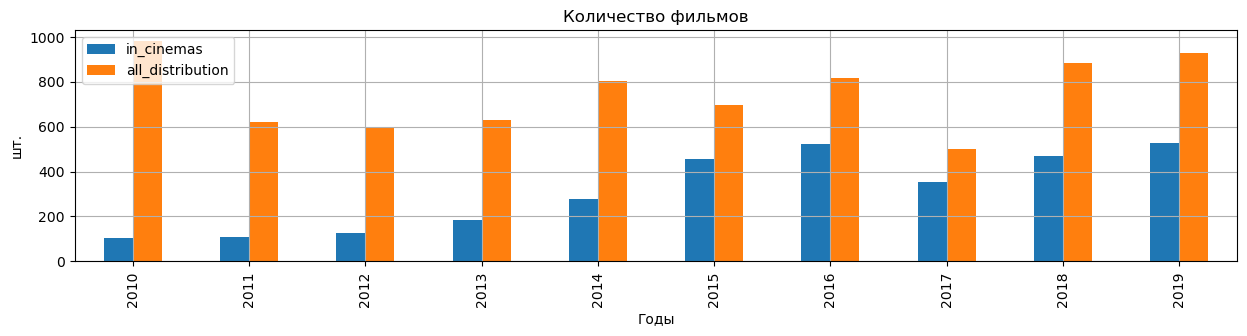

In [77]:
distribution_year.plot(kind='bar', y=['in_cinemas','all_distribution'], figsize=(15, 3), grid=True);

plt.title('Количество фильмов')
plt.xlabel('Годы');
plt.ylabel('шт.')
plt.show()

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [79]:
box_office_sum = df.pivot_table(index='film_distribution_year', values=['box_office'], aggfunc='sum')
box_office_sum

,box_office
film_distribution_year,
2010,"2,428,654"
2011,"14,102,765"
2012,"6,955,423"
2013,"29,799,706"
2014,"7,434,717,843"
2015,"38,427,444,492"
2016,"46,742,316,269"
2017,"47,364,913,115"
2018,"48,674,622,552"


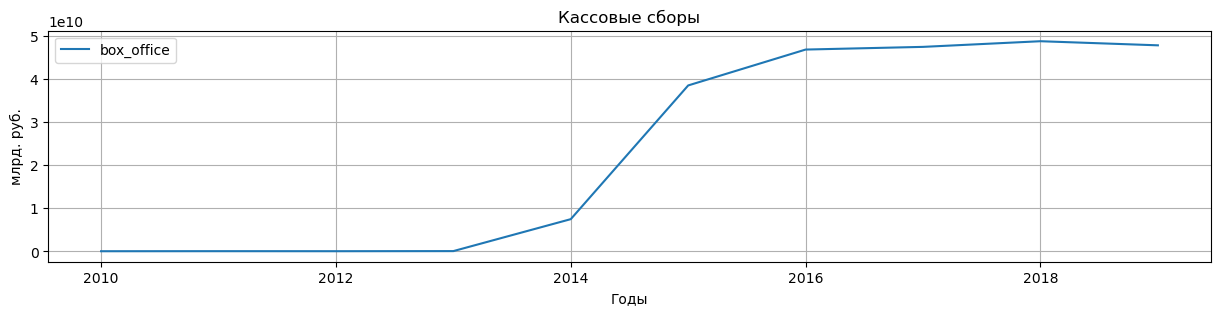

In [80]:
box_office_sum.plot(grid=True, figsize=(15, 3));

plt.title('Кассовые сборы')
plt.xlabel('Годы')
plt.ylabel('млрд. руб.');



Минимальные сборы были в 2010 году (2,4 млрд. руб.). Максимальные - в 2018, 49,6 млрд. рублей.

Сборы начали резко расти, начиная с 2014 года.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [83]:
box_office_median_mean = df.pivot_table(index='film_distribution_year', values='box_office', aggfunc=['mean', 'median'])
box_office_median_mean.columns=['mean', 'median']
box_office_median_mean


,mean,median
film_distribution_year,,
2010,"23,130","1,700"
2011,"129,383","3,000"
2012,"54,339","5,660"
2013,"161,955","3,522"
2014,"26,743,589","18,138"
2015,"84,270,712","4,742,672"
2016,"89,373,454","3,776,088"
2017,"134,178,224","9,876,765"
2018,"103,563,027","8,730,278"


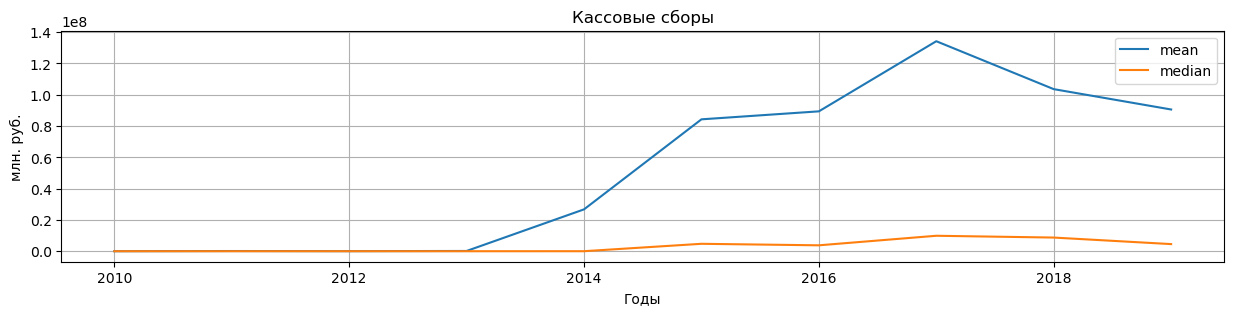

In [84]:
box_office_median_mean.plot(grid=True, figsize=(15, 3));
plt.title('Кассовые сборы')

plt.xlabel('Годы');
plt.ylabel('млн. руб.');

С 2014 года растет медиана и среднее арифметическое, но среднее арифметическое растет значительно больше. Вероятно это связано с отдельными фильмами, которые сильно влияют на общие кассовые сборы. При этом, начиная с 2017 начинается падение. Что не скажешь про абсолютные цифры кассовых сборов. Получается что фильмов стало больше, прибыль с каждого фильма стала снижаться с 2017 года.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

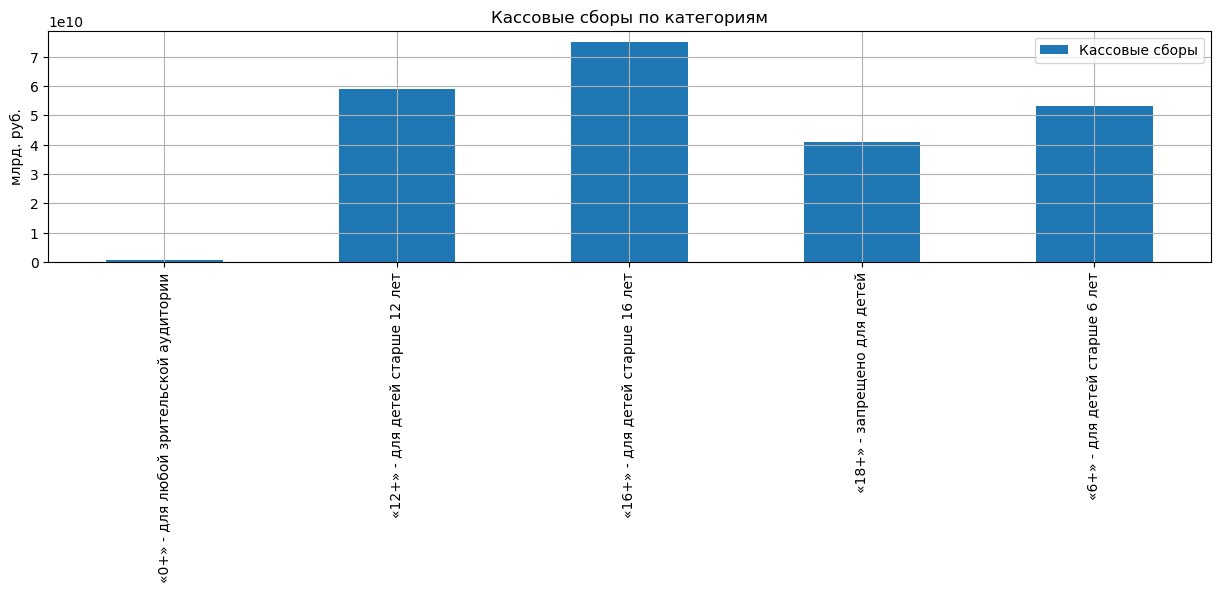

In [87]:
film_distribution_after_2014 = df[df.film_distribution_year > 2014].rename(columns={'box_office': 'Кассовые сборы'}).pivot_table(index='age_restriction', values='Кассовые сборы', aggfunc='sum')

film_distribution_after_2014.plot(kind='bar', grid=True, figsize = (15,3));
plt.title('Кассовые сборы по категориям');
plt.xlabel('');
plt.ylabel('млрд. руб.');

На первом месте - фильмы для детей старше 16 лет.

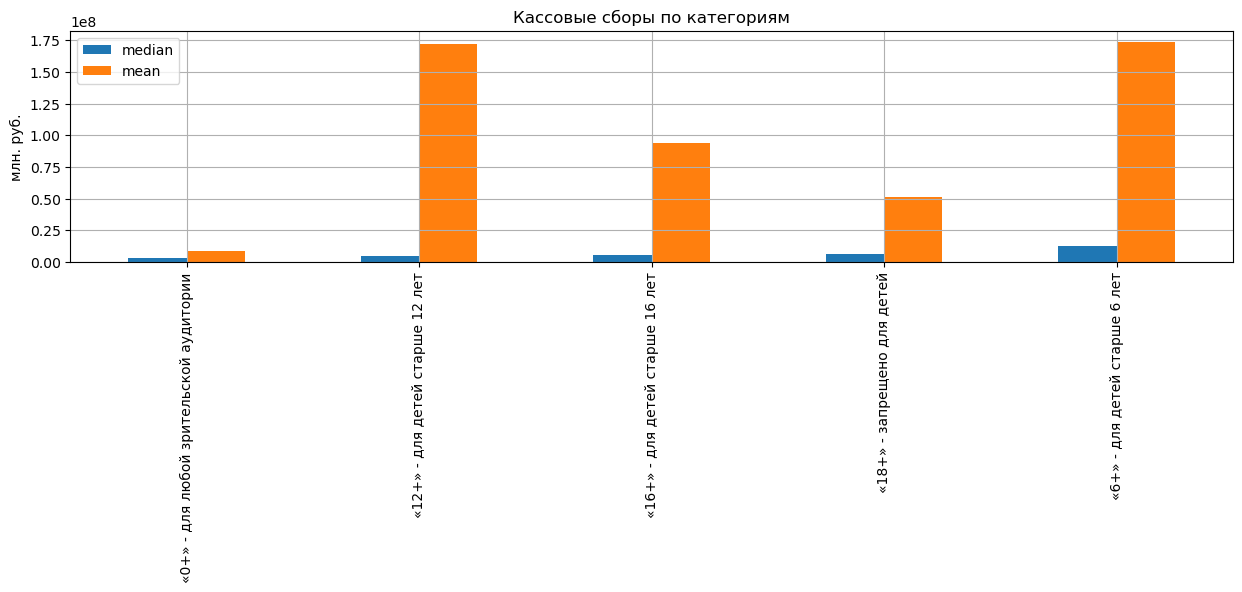

In [89]:
data_by_categories_median_mean = df[df.film_distribution_year > 2014].pivot_table(index='age_restriction', values='box_office', aggfunc=['median', 'mean'])
data_by_categories_median_mean.columns = ['median', 'mean']
data_by_categories_median_mean.plot(kind='bar', grid=True, figsize = (15,3));
plt.title('Кассовые сборы по категориям');
plt.xlabel('');
plt.ylabel('млн. руб.');
#df[df.film_distribution_year > 2014].pivot_table(index='age_restriction', values='box_office', aggfunc=['median', 'mean'])


Наблюдается большая разница между медианой и среднем значением во всех категориях. Это говорит о том что в каждой категории есть большие хиты, которые сильно отличаются от медианных значений.

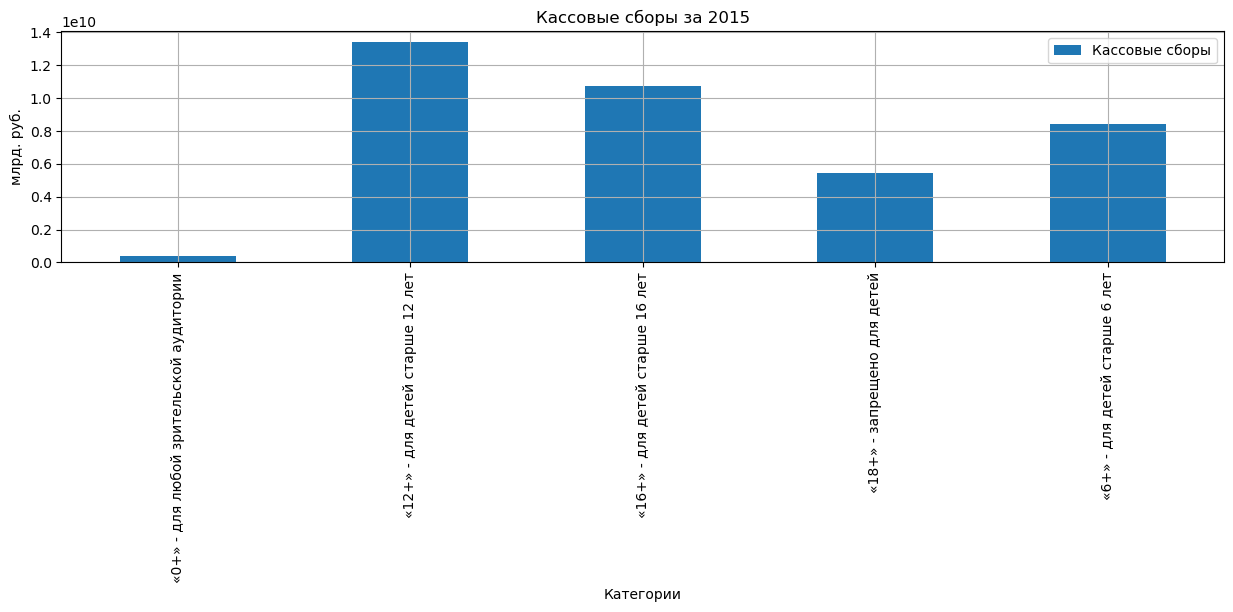

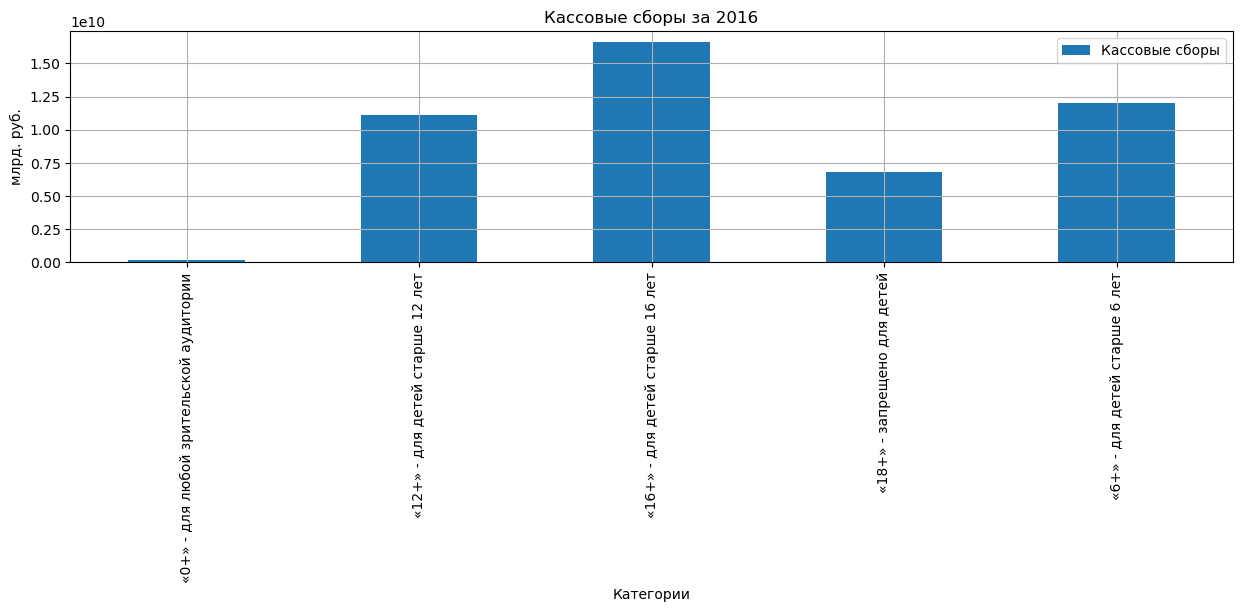

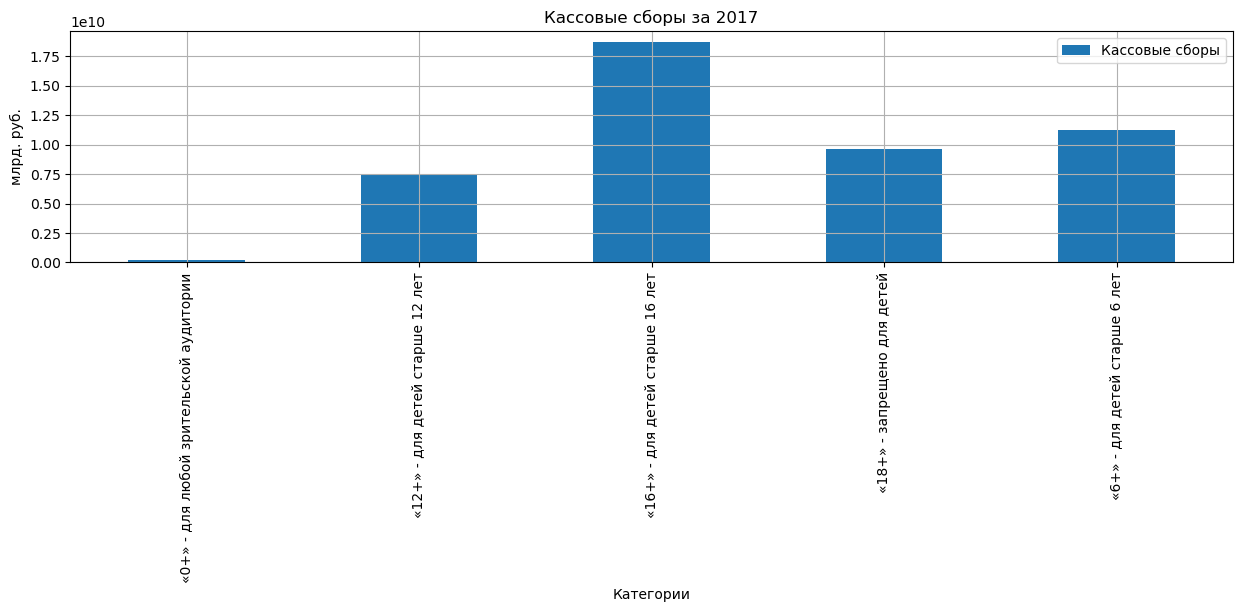

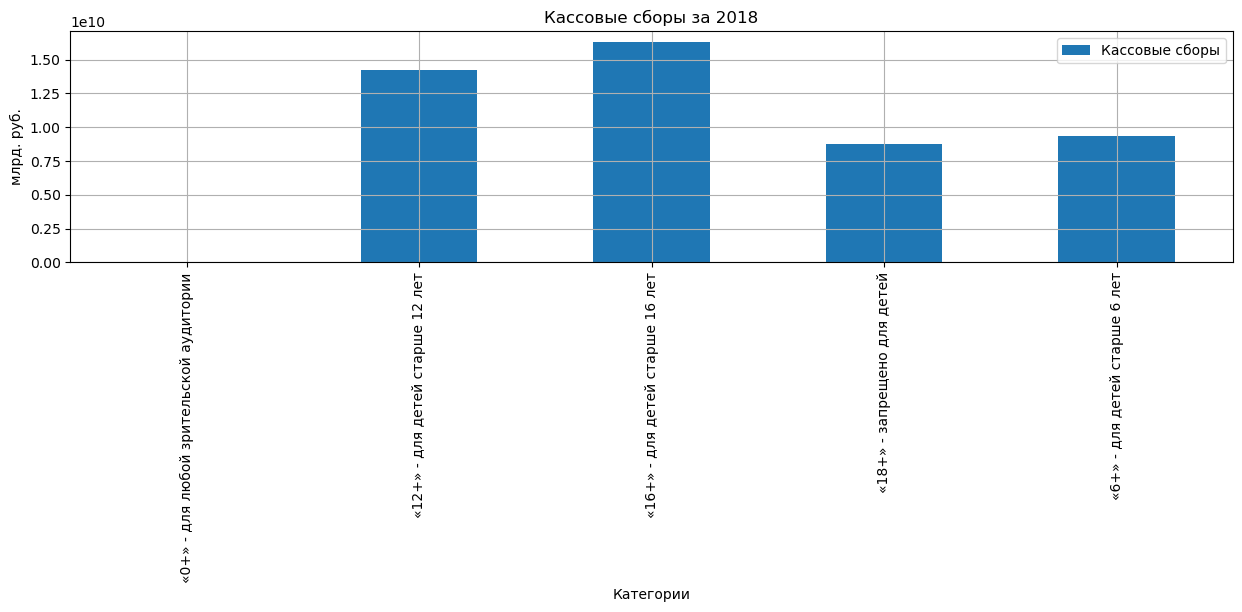

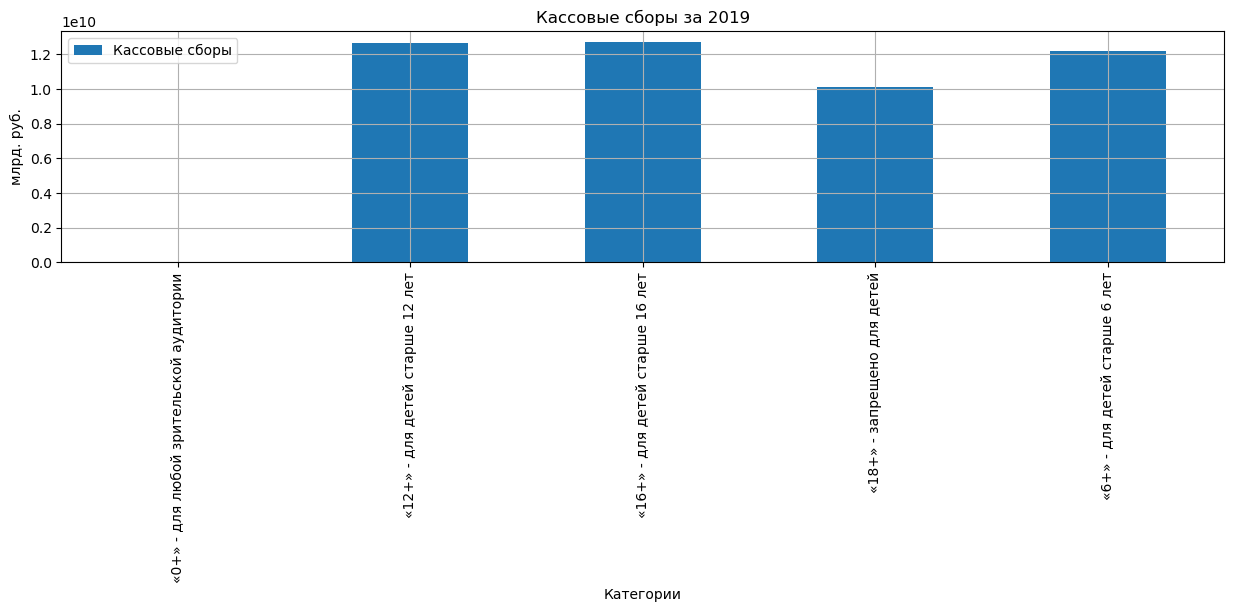

In [91]:
years = [2015,2016, 2017, 2018, 2019]
for year in years:
    title = "Кассовые сборы за %s" % year
    df[df.film_distribution_year == year].rename(columns={'box_office': 'Кассовые сборы'}).pivot_table(index='age_restriction', values='Кассовые сборы', aggfunc='sum').plot(kind='bar', grid=True, figsize = (15,3));
    plt.title(title);
    plt.xlabel('Категории');
    plt.ylabel('млрд. руб.');

    

В 2015 году на первом месте были фильмы для детей старше 12 лет.

С 2016 года установались тенденция характерная для всего датасета - на 1 месте фильмы категории 16+. Сборы по фильмам категрии 12+ упали.

В 2017 распределение сохраняется.

В 2018 году 16+ по-прежнему лидер. При этом, прокат в категории 12+ вырос. Также третий год подряд растет категория 18+.

В 2019 году произошло более равномерное распределение проката по категориям. Из вычислений выше мы знаем что средние сборы (медиана и среднее арифметическое) начали снижаться с 2017 года. Вероятно это связано что в кино стали ходить больше семьями. Семьями часто ходят на ранние сеансы, где билет стоит дешевле. Возможно все это привело к снижению рентабельности, начиная с 2017 года. Зато вырос оборот.

Вывод:

Мы проверили исследовательский анализ данных. Посмотрели сколько фильмов выходило в прокат каждый год, исследовали динамику кассовых сборов по годам и категорим. 

Общее количество фильмов в прокате росло вплоть до 2014 года. Потом была стагнация. Начиная с 2018 года рост возобновился.

Количество фильмов, прокатываемых в кинотеатрах, росло до 2016 года включительно. В 2017 был спад. Дальше рост возобновился.

Минимальные сборы были в 2010 году (2,4 млрд. руб.). Максимальные - в 2018, 49,6 млрд. рублей. Сборы начали резко расти, начиная с 2014 года.

С 2014 года растет медиана и среднее арифметическое кассовых сборов, но среднее арифметическое растет значительно больше. Вероятно это связано с отдельными фильмами(хитами), которые сильно влияют на общие кассовые сборы. При этом, начиная с 2017 начинается падение. Что не скажешь про абсолютные цифры кассовых сборов. Получается что фильмов стало больше, прибыль с каждого фильма стала снижаться с 2017 года.

Наблюдается большая разница между медианой и среднем значением касоовых сборов во всех категориях(0+, 6+, 12+, 16+, 18+). Это говорит о том что в каждой категории есть большие хиты, которые сильно отличаются от медианных значений.


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

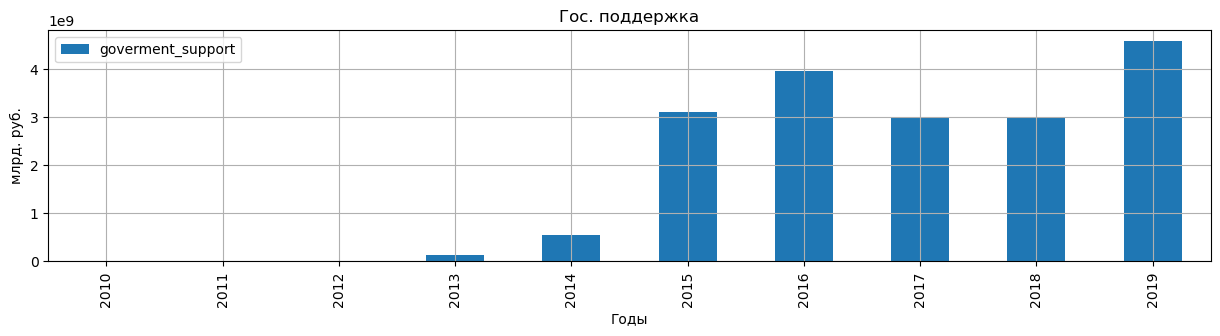

In [95]:
df['goverment_support'] = df['refundable_support'] + df['nonrefundable_support']

government_support_rub = df.pivot_table(index='film_distribution_year', values='goverment_support', aggfunc='sum')

government_support_rub.plot(kind='bar', grid=True, figsize = (15,3));
plt.title('Гос. поддержка');
plt.xlabel('Годы');
plt.ylabel('млрд. руб.');

В целом, тренд восходящий.

Количество фильмов с данными по бюджету: 307


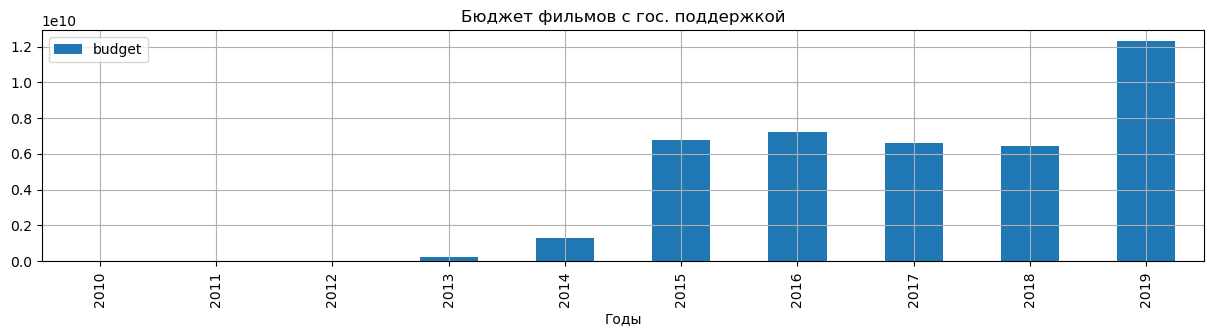

In [97]:
budget_by_year = df.pivot_table(index='film_distribution_year', values='budget', aggfunc='sum').plot(kind='bar', grid=True, figsize = (15,3));
plt.title('Бюджет фильмов с гос. поддержкой');
plt.xlabel('Годы');
print("Количество фильмов с данными по бюджету:",df['budget'].count())

Рост бюджетов фильмов повторяет график гос. поддержки.

Количество фильмов с гос. поддержкой: 307


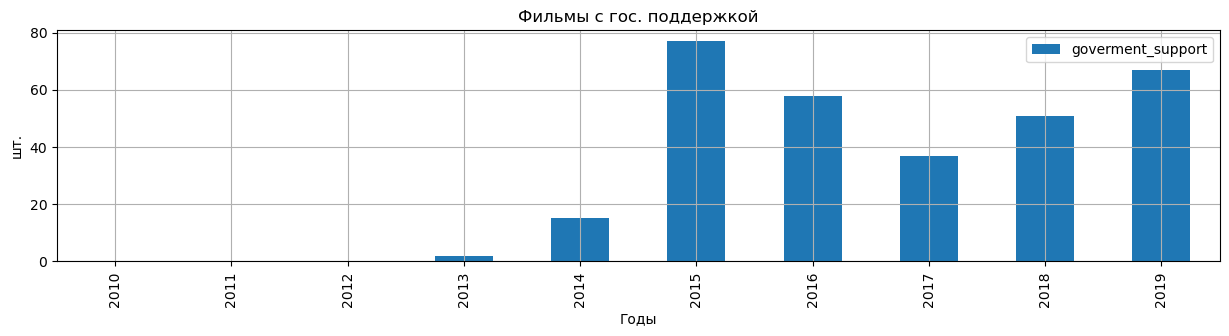

In [99]:
government_support_q = df.pivot_table(index='film_distribution_year', values='goverment_support', aggfunc='count')

government_support_q.plot(kind='bar', grid=True, figsize=(15, 3));
plt.title('Фильмы с гос. поддержкой');
plt.ylabel('шт.')
plt.xlabel('Годы');
print("Количество фильмов с гос. поддержкой:",df['goverment_support'].count())

Количество фильмов с гос. поддержкой падало, начиная с 2016, 2017 год. Только с 2018 года начался рост.

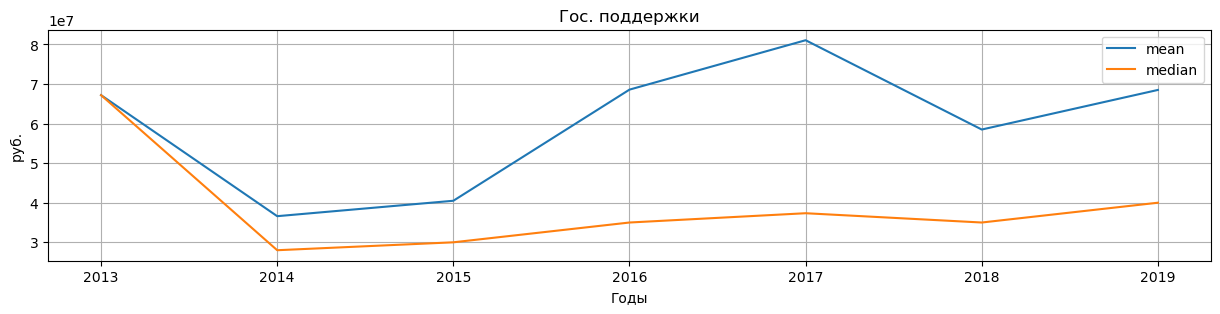

In [101]:
government_support_median_mean = df.pivot_table(index='film_distribution_year', values='goverment_support', aggfunc=['mean', 'median'])
government_support_median_mean.columns=['mean', 'median']
government_support_median_mean.plot(grid=True, figsize=(15, 3));
plt.title('Гос. поддержки')

plt.xlabel('Годы')
plt.ylabel('руб.');



Медиана резко выросла в 2017 году по гос. поддержки. Из вычислений выше гос. поддержка в абсолютных цифрах не росла в 2017 году. Количество фильмов сократилось. Это говорит о том что резко выросла поддержка отдельных фильмов.

- Чтобы посчитать оккупаемость, нужно удалить строчки, где нет данных по бюджету \ кассовым сборам.

Количество фильмов с данными по бюджету и кассовым сборам: 293


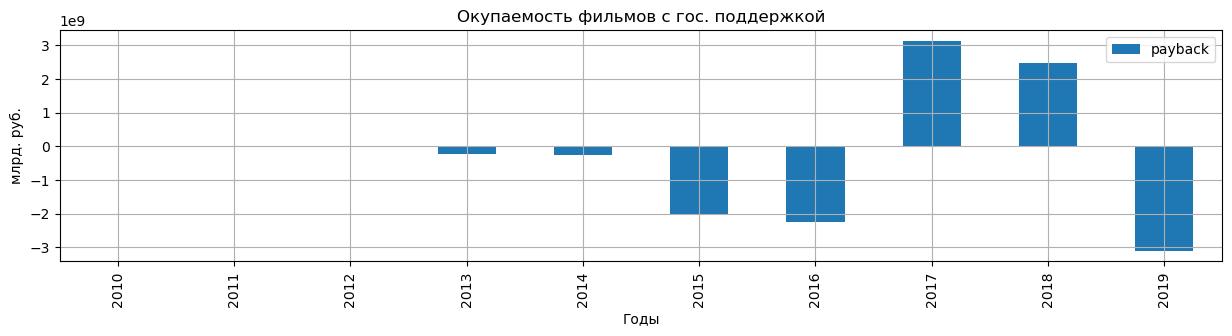

In [104]:
payback_data = df.dropna(subset=['budget', 'box_office'])
df['payback'] = payback_data['box_office'] - payback_data['budget']
df.pivot_table(index='film_distribution_year', values='payback', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 3));
plt.title('Окупаемость фильмов с гос. поддержкой');
plt.xlabel('Годы');
plt.ylabel('млрд. руб.')
print("Количество фильмов с данными по бюджету и кассовым сборам:", df.payback.count())

В 2017-2018 годах фильмы вышли на уровень окупаемости. 2019 год был снова убыточный.

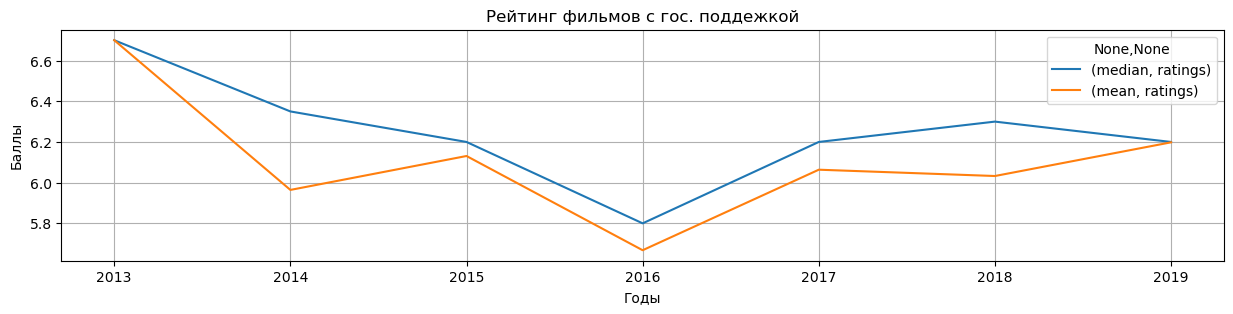

In [106]:
payback_data.pivot_table(index='film_distribution_year', values='ratings', aggfunc=['median', 'mean']).plot(grid=True, figsize=(15, 3));
plt.title('Рейтинг фильмов с гос. поддежкой')

plt.xlabel('Годы')
plt.ylabel('Баллы');


Рейтинг сильно просел в 2016 году. В 2017-2018 году рейтинг рос. Это отчасти совпадает с графиком медианы, среднего арифметического гос. поддержки. Получается, что в 2016-2017 резко выросла медиана (и среднее арифметическое) гос. поддержки. Думаю, это поспособствовало росту рейтингов, так как был организованы большие маркетинговые кампании.

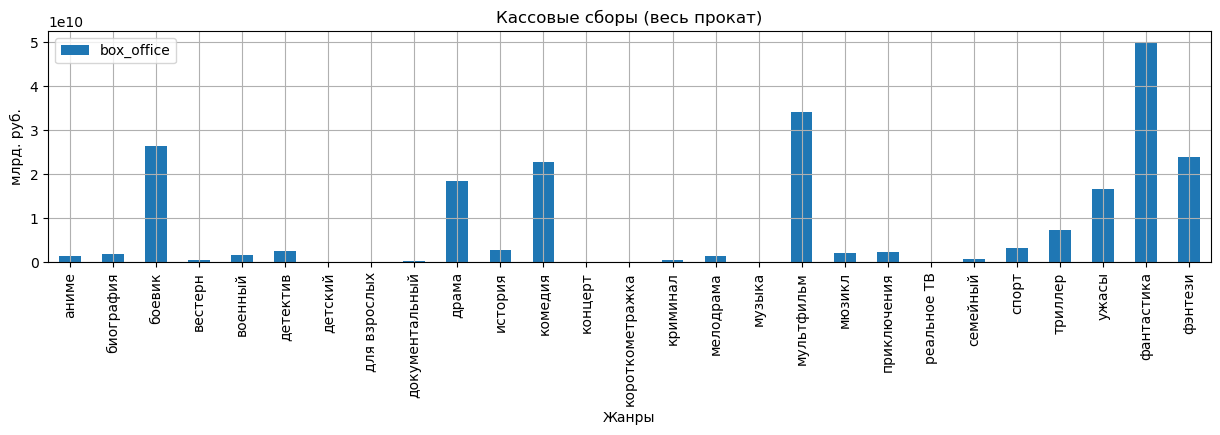

In [108]:
film_distribution_by_genres = df[df.film_distribution_year > 2014].pivot_table(index='key_genre', values='box_office', aggfunc='sum')

film_distribution_by_genres.plot(kind='bar', grid=True, figsize=(15, 3));
plt.title('Кассовые сборы (весь прокат)');
plt.xlabel('Жанры');
plt.ylabel('млрд. руб.');

Самые кассовые фильмы в жанре "фантастика", "мультфильмы", "боевик".

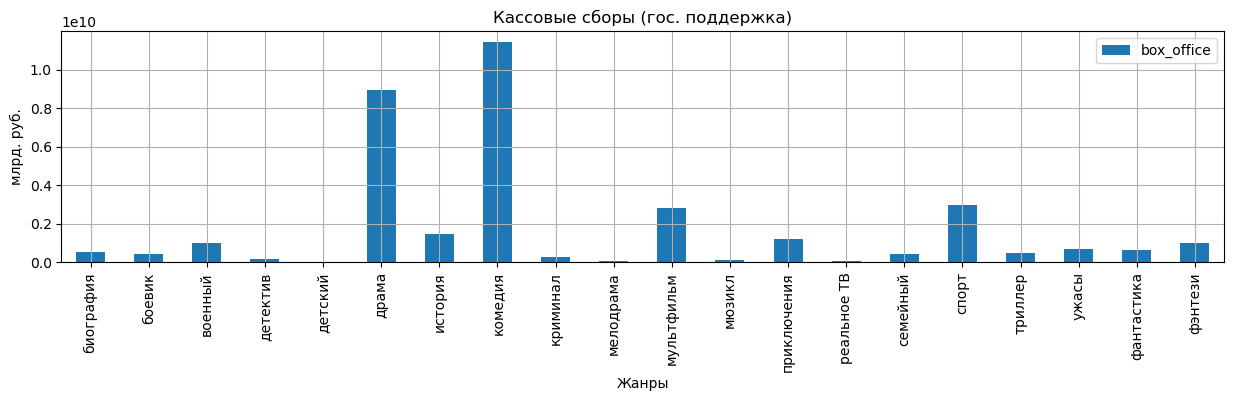

In [110]:
payback_data[payback_data.film_distribution_year > 2014].pivot_table(index='key_genre', values='box_office', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 3));
plt.title('Кассовые сборы (гос. поддержка)');
plt.xlabel('Жанры');
plt.ylabel('млрд. руб.');

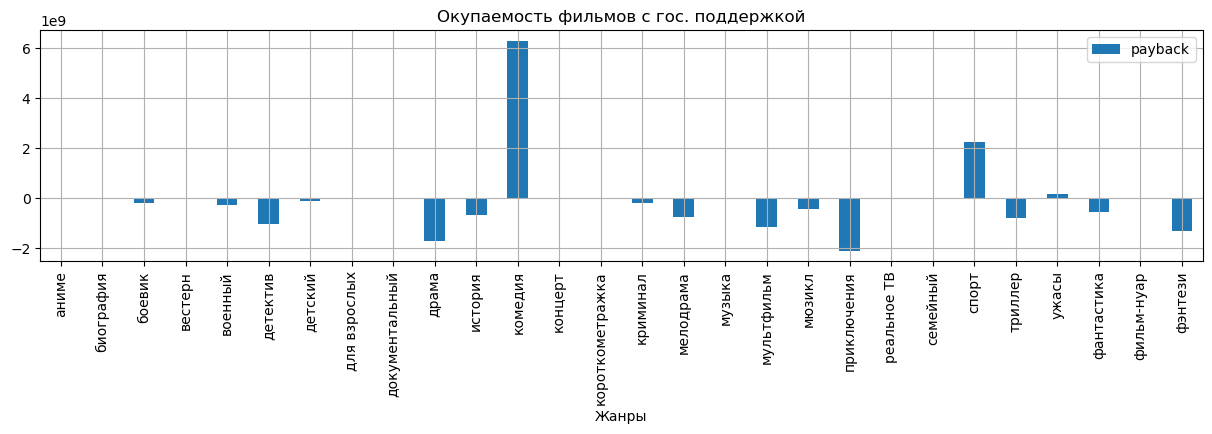

In [111]:
df.pivot_table(index='key_genre', values='payback', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 3));
plt.title('Окупаемость фильмов с гос. поддержкой');
plt.xlabel('Жанры');

Комедии с гос. поддержкой являются самыми кассовыми, а также самыми рентабельными проектами.

In [113]:
directors_breakdown = df[df.film_distribution_year > 2014].pivot_table(index='director_one', values=['box_office', 'budget', 'payback', 'goverment_support'], aggfunc='sum')

top_10_directors = directors_breakdown.query('payback != 0').sort_values(by='payback', ascending=False).head(10)
top_10_directors

print('Общая прибыль 10 самых окупаемых режиссеров:',top_10_directors.payback.sum().round())

Общая прибыль 10 самых окупаемых режиссеров: 13168518906.0


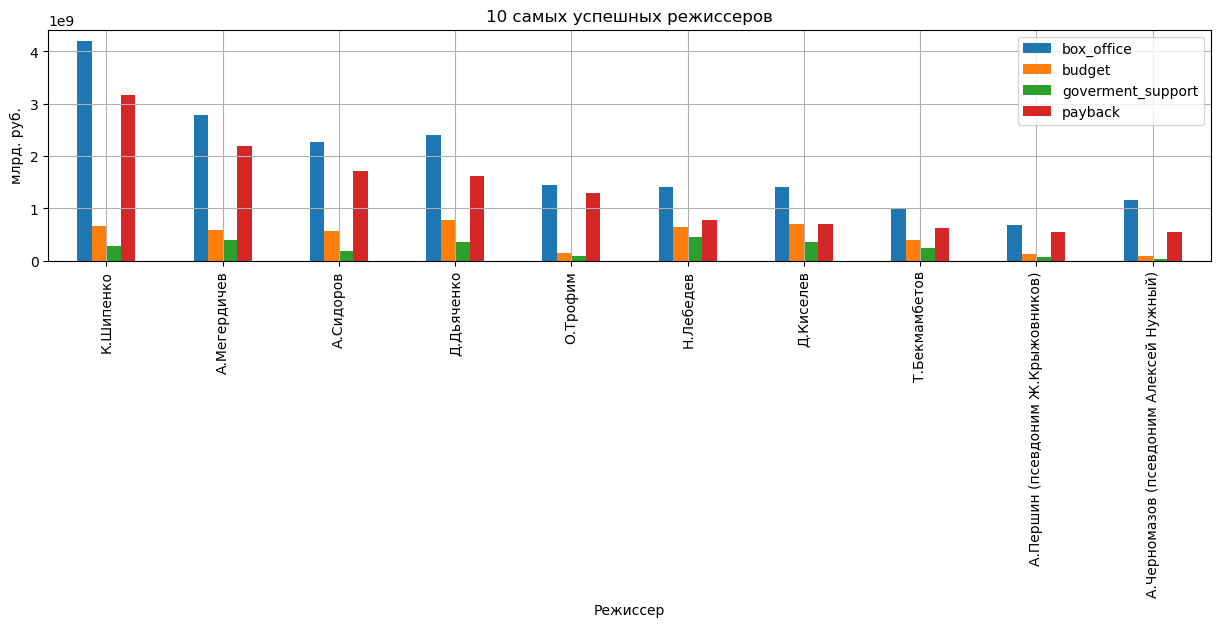

In [114]:
top_10_directors.plot(kind='bar', grid=True, figsize=(15, 3));
plt.title('10 самых успешных режиссеров');
plt.ylabel('млрд. руб.')
plt.xlabel('Режиссер');

In [115]:
top_movies = df.sort_values(by='payback', ascending=False).head(10)
top_movies[['title', 'director_one', 'key_genre', 'film_distribution_year', 'age_restriction','goverment_support', 'box_office', 'payback',]]

,title,director_one,key_genre,film_distribution_year,age_restriction,goverment_support,box_office,payback
7454,Холоп,К.Шипенко,комедия,2019,«12+» - для детей старше 12 лет,"60,000,000","3,073,568,691","2,913,568,691"
5651,Движение вверх,А.Мегердичев,спорт,2017,«6+» - для детей старше 6 лет,"400,000,000","2,779,686,144","2,189,493,953"
6547,Т-34,А.Сидоров,драма,2018,«12+» - для детей старше 12 лет,"180,000,000","2,271,754,005","1,707,969,288"
5503,Последний богатырь,Д.Дьяченко,комедия,2017,«12+» - для детей старше 12 лет,"100,000,000","1,655,037,688","1,302,560,113"
5706,Лёд,О.Трофим,NaN,2018,«12+» - для детей старше 12 лет,"85,000,000","1,445,731,798","1,297,146,576"
2918,Экипаж .,Н.Лебедев,драма,2016,«6+» - для детей старше 6 лет,"442,104,482","1,402,255,390","766,971,523"
5639,Ёлки Новые,Д.Киселев,комедия,2017,«6+» - для детей старше 6 лет,"100,000,000","855,451,052","681,069,130"
2699,Самый Лучший День,А.Першин (псевдоним Ж.Крыжовников),комедия,2015,«16+» - для детей старше 16 лет,"63,000,000","683,029,061","552,409,725"
5747,Я худею,А.Черномазов (псевдоним Алексей Нужный),комедия,2018,«16+» - для детей старше 16 лет,"30,000,000","633,462,267","545,813,140"
3103,Иван Царевич и Серый Волк 3,Д.Шмидт,мультфильм,2015,«6+» - для детей старше 6 лет,"40,000,000","704,928,216","525,670,229"


In [116]:
print('Общая прибыль 10 самых окупаемых фильмов:',top_movies.payback.sum().round())

Общая прибыль 10 самых окупаемых фильмов: 12482672367.0


Общая прибыль 10 самых окупаемых фильмов - 12.4 млрд. руб. Общая прибыль 10 самых окупаемых режиссеров - 13.1 млрд. руб. Другими словами, цифры практически идентичны. Также практически все 10 самых успешных режиссера являются главными режиссерами 10 топовых фильмов. Категория - 12+ и 16+, в основном. Практически все фильмы 2017-2018 года, когда общие затраты гос. поддержки окупились. 5 фильмов из 10 - комедии.

Вывод:

Мы провели исследование фильмов, которые получили государственную поддержку. 

Государственная поддержка, в целом, имеет восходящий тренд. Бюджеты фильмов с государственной поддержкой также постепенно увеличиваются(с некоторой просадкой в 2017-18 годах).

Медиана фильмов с государственной поддержкой резко выросла в 2017 году по гос. поддержки. При этом, гос. поддержка в абсолютных цифрах не росла в 2017 году. Количество фильмов с гос. поддержкой сократилось. Это говорит о том что резко выросла поддержка отдельных фильмов.

В 2017-2018 годах фильмы с государственной поддержкой вышли на уровень окупаемости. 2019 год был снова убыточный.

Рейтинг сильно просел в 2016 году. В 2017-2018 году рейтинг рос. Также в 2016-2017 резко выросла медиана (и среднее арифметическое) гос. поддержки. Похоже это способствовало росту рейтингов, так как был организованы большие маркетинговые кампании.

Комедии с гос. поддержкой являются самыми кассовыми, а также самыми рентабельными проектами.

Общая прибыль 10 самых окупаемых фильмов - 12.4 млрд. руб. Общая прибыль 10 самых окупаемых режиссеров - 13.1 млрд. руб. Также практически все 10 самых успешных режиссера являются главными режиссерами 10 топовых фильмов. Категория - 12+ и 16+, в основном.

### Шаг 5. Напишите общий вывод

Исследование данных о российском кинопрокате в 2010-19 годах.

1. Были получены два фаила с данными. В первом фаиле содержится основная информация о российском прокате. Второй фаил содержал данные о кассовых сборах. Обе таблицы были объедены по номеру прокатного удостоверения. 
2. Прежде чем проводить исследование был проведен первичный анализ данных, во время которого было выявлено:
 - Некорректные типы данных
 - Большое количество пропусков в четырех столбцах: refundable_support; nonrefundable_support; budget; financing_source
 - 4 неявных дубликата в столбце pu_number
 - пробелы в столбце type
 - "-" в столбце production_country
 - Отсутствует отступ после запятой с столбце genres
 - Были выявлены 16 строк с нулевым бюджетом, при этом, имеется гос. поддержка
 - Было выявлен 231 фильм с кассовыми сборами меньше 1000 рублей
 - Неправильное написание столбца pu_number (puNumber)

По результатам первичного анализа данных была проведена предобработка данных:
 - Был изменен тип данных с object на date в столбце show_start_date
 - Был изменен тип данных с object на float
 - 7152 пропуска в четырех столбцах. Скорей всего это связано с тем что в этих строчках содержится информация об иностранных фильмах. 4326 пропуска в столбце box_office. Это может быть связано с тем что эти фильмы не прокатывались в кинотеатрах. Остальные пропуски также оставим как есть, так как нет возможности заменить их на что-либо достоверное. Был проведен анализ пропусков по годам. Было выявлено что пропуски распределены равномерно.
 - 4 явных дубликаты были удалены.
 - В столбце title очень много дубликатов (17%). У них отличаются даты проката. Похоже их прокатывали разные прокатчики. Оставим эти строки.
 - Были удалены пробелы в столбце type
 - Были заменены "-" на "," в столбце production_country
 - Были заменены "," на ", " в столбце genres
 - Были удалены 16 строчек, где бюджет фильма равен нулю, при этом имеется гос. поддержка
 - Было изменено название столбца puNumber на pu_number
 - Столбцы title, film_studio, producer, director, production_country, genres содержат, по сути, списки. Это затруднит дальнейший анализ если будут использоваться эти столбцы для анализа. В частности, нам понадобятся данных столбцов director, genres. Чтобы исправить это, в шаге 2.6 добавим новые столбцы director_one и key_genre, где укажем ключевых режиссеров и основной жанр (первые значения из списка).
 - Была почитана доля гос. поддержки от бюджета фильма. Она в среднем составляет 59%

3. Был проведен исследовательский анализ данных, в ходе которого было выявлено:
 - Общее количество фильмов всего в российском прокате: 7,455. Количество фильмов в прокате в кинотеатрах: 3,133 (42.03%).
 - Общее количество фильмов в прокате росло вплоть до 2014 года. Потом было боковое движение. Начиная с 2018 года начался снова рост.
 - Количество фильмов, прокатываемых в кинотеатрах, росло из до 2016 года включительно. В 2017 наблюдается спад. Дальше рост возобновился.
 - Минимальные сборы были в 2010 году (2,4 млрд. руб.). Максимальные - в 2018, 49,6 млрд. рублей.
 - Сборы начали резко расти, начиная с 2014 года.
 - С 2014 года растет медиана и среднее арифметическое кассовых сборов, но среднее арифметическое растет значительно больше. Вероятно это связано с отдельными фильмами, которые сильно влияют на общие кассовые сборы. При этом, начиная с 2017 начинается падение. Что не скажешь про абсолютные цифры кассовых сборов. Получается что фильмов стало больше, прибыль с каждого фильма стала снижаться с 2017 года.
 - Сборы по категориям: на первом месте - фильмы для детей старше 16 лет. В 2015 году на первом месте были фильмы для детей старше 12 лет. С 2016 года установилась тенденция характерная для всего датасета - на 1 месте фильмы категории 16+. Сборы по фильмам категории 12+ упали. В 2017 распределение сохраняется. В 2018 году 16+ по-прежнему лидер. При этом, прокат в категории 12+ вырос. Также третий год подряд растет категория 18+. В 2019 году произошло более равномерное распределение проката по категориям. Из анализа выше мы знаем что средние сборы (медиана и среднее арифметическое) начали снижаться с 2017 года. Вероятно это связано что в кино стали ходить больше семьями. Семьями часто ходят на ранние сеансы, где билет стоит дешевле. Возможно все это привело к снижению рентабельности, начиная с 2017 года. Зато вырос оборот. 
 - В сборах по категориям также наблюдается большая разница между медианой и среднем значением во всех категориях. Это говорит о том что в каждой категории есть большшие хиты, которые сильно отличаются от медианных значений.
 - Гос. поддержка, в целом, растет. Бюджет фильмов с гос. поддержкой также растет. При этом, количество фильмов с гос. поддержкой падало в 2016, 2017 годах. С 2018 года количество фильмов с гос. поддержкой выросло. Медиана гос. поддержки резко выросла в 2017 году. Из вычислений выше видно, что гос. поддержка в абсолютных цифрах не росла в 2017 году. Количество фильмов сократилось. Это говорит о том что резко выросла поддержка отдельных фильмов в этом году.
 - Рейтинг фильмов с гос. поддержкой сильно просел в 2016 году. В 2017-2018 году рейтинг рос. Это отчасти совпадает с графиком медианы, среднего гос. поддержки. Получается, что в 2016-2017 резко выросла медиана (и среднее арифметическое) гос. поддержки. Думаю, это поспособствовало росту рейтингов, так как был организованы большие маркетинговые кампании.
 - Самые кассовые фильмы в жанре "фантастика", "мультфильмы", "боевик". Если говорить про фильмы с гос. поддержкой, то здесь самый кассовый жанр - комедия. Он же самый окупаемый. 
 - Общая прибыль 10 самых окупаемых фильмов - 12.4 млрд. руб. Общая прибыль 10 самых окупаемых режиссеров - 13.1 млрд. руб. Другими словами, цифры практически идентичны. Также практически все 10 самых успешных режиссера являются главными режиссерами 10 топовых фильмов. Категория - 12+ и 16+, в основном. Практически все фильмы 2017-2018 года, когда общие затраты гос. поддержки окупились.

 
 

 

